In [3]:
%cd ~/GitHub/pfcompute/


/Users/timothydavenport/GitHub/pfcompute


In [59]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

import pf.forecasting


In [53]:
# Average College Graduate
average_grad = {
    'income': 48707.0,           # Average Graduate Salary
    'initial_balance': 4000.0,
    'income_increase': 0.030,
    'savings_rate': 0.054,       # Average National Saving Rate
    'withdrawal_rate': 0.040,
    'return_rate': 0.025,        # Average National Mutual Fund Return
    'age': 22,
    'life_expectancy': 90,
    'max_spending': 90000.0,
    'start': '2015-01-01',
    'expense_increase': True
}

# Average FI focused Graduate
average_fi_grad = {
    'income': 74367.00,          # Higher Income Occupation Average Salary (e.g. Engineering)
    'initial_balance': 4000.00,
    'income_increase': 0.030,
    'savings_rate': 0.50,        # Above Average Savings Rate
    'withdrawal_rate': 0.04,
    'return_rate': 0.074,        # Passive Index Investing (S&P500)
    'age': 23,
    'life_expectancy': 90,
    'max_spending': 50000.0,     # Assumed to be happier with less consumption
    'start': '2016-01-01',
    'expense_increase': True
}


In [54]:
# Calculate Cashflows
grad_cashflow_table = pf.forecasting.assumption_fi_forecast(**average_grad)
fi_grad_cashflow_table = pf.forecasting.assumption_fi_forecast(**average_fi_grad)


(22.0, 90.0)

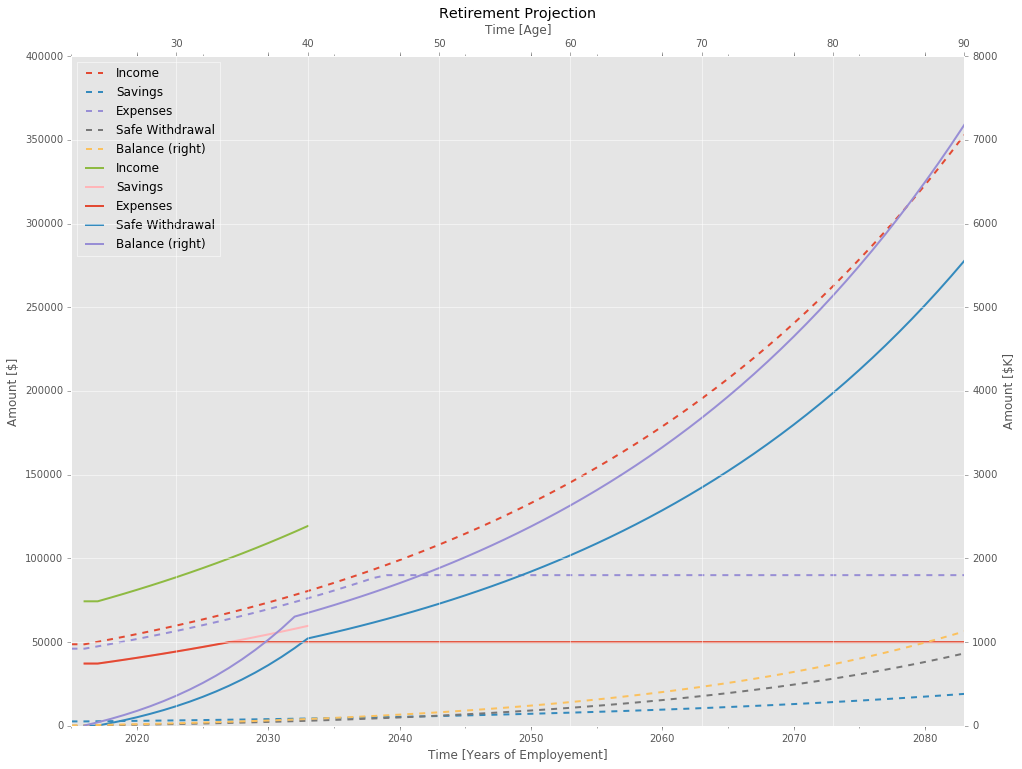

In [55]:
ax = grad_cashflow_table[['Income', 'Savings', 'Expenses', 'Safe Withdrawal']].plot(style='--', lw=2)
(grad_cashflow_table[['Balance']] / 1000.0).plot(secondary_y=True, style='--', lw=2, legend=True, ax=ax)
fi_grad_cashflow_table[['Income', 'Savings', 'Expenses', 'Safe Withdrawal']].plot(lw=2, ax=ax)
ax1 = (fi_grad_cashflow_table[['Balance']] / 1000.0).plot(secondary_y=True, lw=2, legend=True, ax=ax)

ax.set_title('Retirement Projection', y=1.05)
ax.set_ylabel('Amount [$]')
ax1.set_ylabel('Amount [$K]')
ax.set_xlabel('Time [Years of Employement]')

ax2 = ax1.twiny()
ax2.set_xlabel('Time [Age]')

age0 = grad_cashflow_table.iloc[0]['Age']
age1 = grad_cashflow_table.iloc[-1]['Age']
ax2.set_xlim(age0, age1)

In [67]:
incomes = np.array(range(30000, 150000, 5000))
savings_rates = np.linspace(0.1, 1, 10)

fiyears = {str(s): [] for s in savings_rates}
for i in incomes:
    for s in savings_rates:
        cashflow = pf.forecasting.assumption_fi_forecast(
            income=i, 
            savings_rate=s, 
            min_spending=15000, 
            max_spending=40000
        )
        fi = cashflow[cashflow.FI == 1]
        r = fi.index[0] if len(fi.index) > 0 else 90
        fiyears[str(s)].append(r)


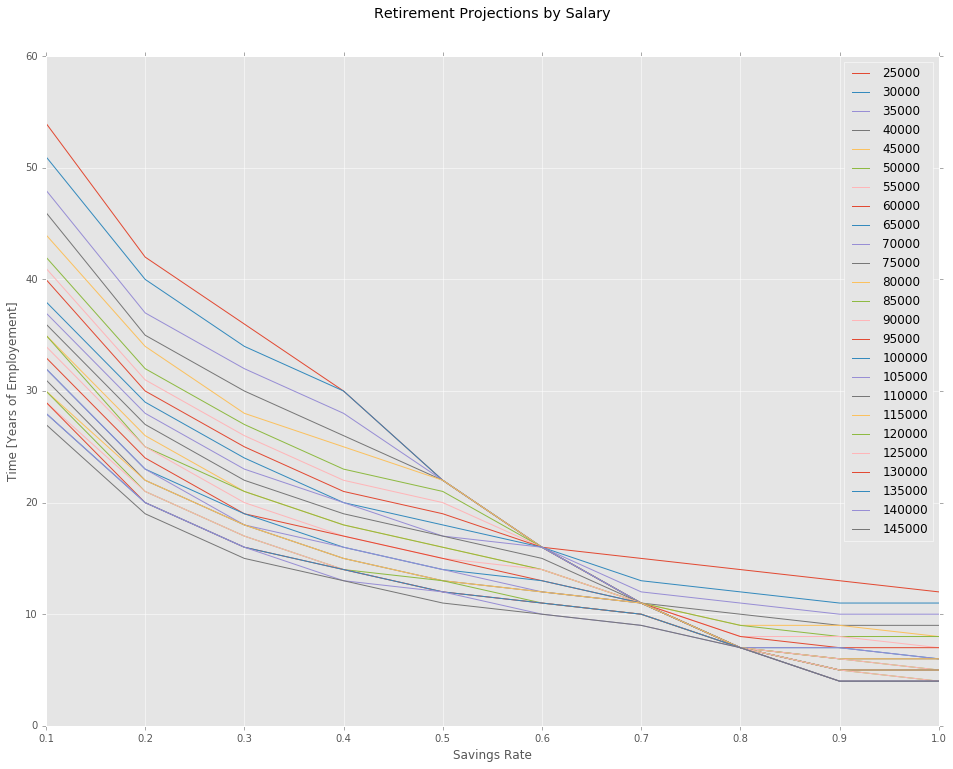

In [68]:
ax = pd.DataFrame(fiyears, incomes).T.plot()
ax.set_title('Retirement Projections by Salary', y=1.05)
ax.set_ylabel('Time [Years of Employement]')
ax.set_xlabel('Savings Rate')


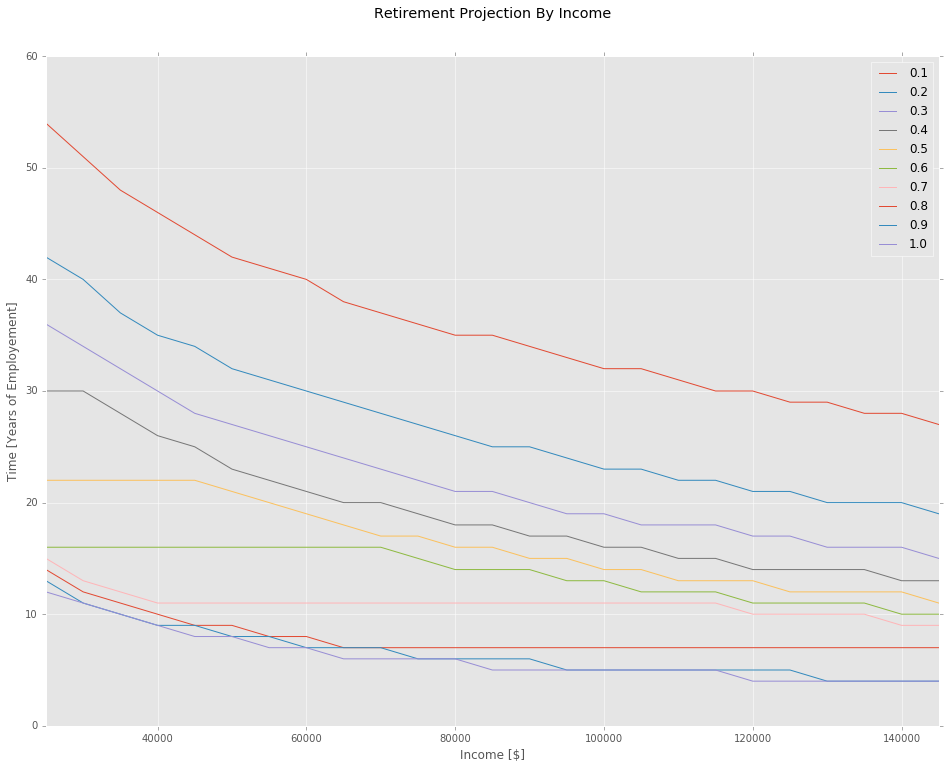

In [69]:
ax = pd.DataFrame(fiyears, incomes).plot()
ax.set_title('Retirement Projection By Income', y=1.05)
ax.set_ylabel('Time [Years of Employement]')
ax.set_xlabel('Income [$]')
